In [52]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

#read the training set into a data frame
df = pd.read_csv('/home/khalaq04/Downloads/linear_regression_dataset.csv')

#first 5 observations
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [53]:
#last 5 observations
df.tail()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640
499,0,0,4,1.0,4931,640


In [54]:
#to check if there are any null values
df.isnull().values.sum()

1

In [55]:
#to find the row(s) with null value(s)
row_w_null = [index for index,row in df.iterrows() if row.isnull().any()]
print(row_w_null)

[276]


In [56]:
#deleting row(s) with null value(s)
df = df.drop(labels=row_w_null, axis=0)

#to check if there are any more null value(s)
df.isnull().values.sum()

0

In [57]:
#rearranging columns
df = df[['TOTCHG','AGE','FEMALE','LOS','RACE','APRDRG']]
df.head()

,TOTCHG,AGE,FEMALE,LOS,RACE,APRDRG
0,2660,17,1,2,1.0,560
1,1689,17,0,2,1.0,753
2,20060,17,1,7,1.0,930
3,736,17,1,1,1.0,758
4,1194,17,1,1,1.0,754


In [58]:
#determining the number of features
no_features = len(df.iloc[:,1:].columns)
no_features

5

In [59]:
#mean normalisation of the features
df.iloc[:,1:] = (df - df.mean())/df.std()

#creating x,y,theta
x = df.iloc[:,1:]
ones = np.ones([len(df),1])
x = np.concatenate((ones,x),axis=1)
y = df.iloc[:,0:1].values
xt = x.T
yt = y.T
theta = np.zeros([1,no_features+1])

#storing the target
target = y

#display the size of the matrices
x.shape,y.shape,theta.shape,xt.shape,yt.shape

((499, 6), (499, 1), (1, 6), (6, 499), (1, 499))

In [60]:
#set number of epochs and the learning rate
epochs=130
alpha=0.01

#generate cost function
def cost_function(xt,yt,theta):
    h = theta@xt
    J = np.sum(np.power((h-yt),2))/(2*len(x))
    return J

#generate gradient descent
def gradient_descent(x,y,xt,yt,theta,epochs,alpha):
    cost = np.zeros(epochs)
    for i in range(epochs):
        h = theta@xt
        theta -= (alpha/len(x))*np.sum(x*(h.T-y),axis=0)
        cost[i] = cost_function(xt,yt,theta)
    return theta,cost

#use gradient descent and display the final values of theta
ftheta,cost = gradient_descent(x,y,xt,yt,theta,epochs,alpha)
ftheta.round()

array([[2026.,  525., -138., 1788.,  -63., -960.]])

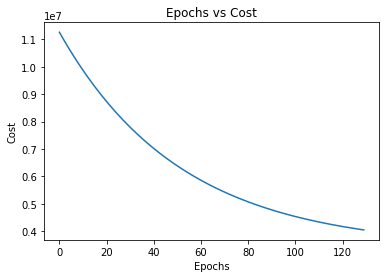

In [61]:
#output plot(op) of the cost after muliple epochs
plt.plot(np.arange(epochs),cost)
plt.title('Epochs vs Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [62]:
#test values for the first five epochs
predictions = ftheta@xt
for i in range(0,5):
    print(predictions[0][i].round(0))

2660.0
1899.0
3327.0
1065.0
1086.0


In [63]:
#to measure the accuracy(margin of error) for the test epochs using root mean sqaured error
print(np.sqrt(((predictions - target[:,0])**2).mean()).round(0))

2843.0
